In [1]:
import QM as q
import numpy as np
import matplotlib.pyplot as plt

BIGGER_SIZE = 18
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [12,8]

In [2]:
def V(x, potential):
    ret = np.vectorize(potential)(x)
    return np.diag(ret)

def T(N, dx):
    ret = -2*np.diag(np.linspace(1,1,N), 0) + np.diag(np.linspace(1,1,N-1), 1) + np.diag(np.linspace(1,1,N-1), -1)
    ret = (-1/(2*dx**2))*ret
    return ret

def H(T, V):
    return q.operator(T + V)

# Harmonic oscillator test

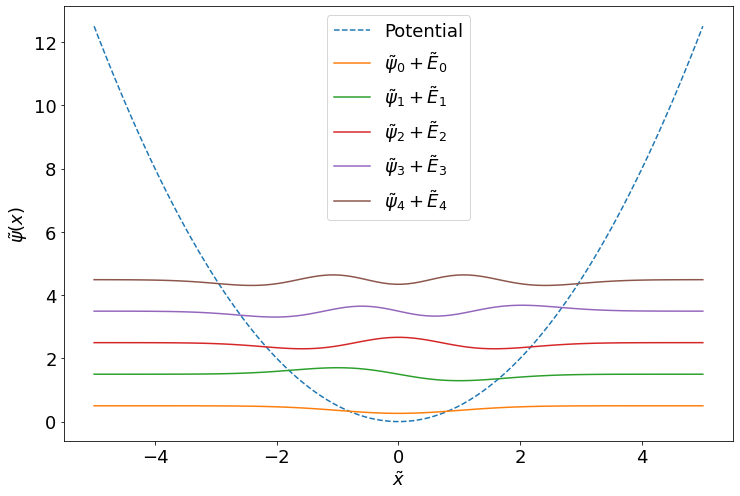

In [3]:
L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)

sho = lambda x:(1/2)*(x**2)
V_sho = V(xarr, sho)

H_sho = q.operator(T(N,dx) + V(xarr, sho))
l, U = H_sho.eig()

plt.plot(xarr, sho(xarr), label='Potential', linestyle='dashed')


for i in range(5):
    plt.plot(xarr, U[:,i]+l[i], label='$\\tilde{\psi}_'+str(i)+'' + '+ \\tilde{E}_' + str(i) + '$')

plt.xlabel('$\\tilde{x}$')
plt.ylabel('$\\tilde{\psi}(x)$')
plt.legend()
plt.savefig('sho_1.png', bbox_inches='tight')
